**DEFINE**

This is a project aimed at predicting the which employees of an organization will likely quit.

In [1]:
#importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
_author_="Temi Akinrinlola"
_email_="tope.akinrinlola@gmail.com"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**DISCOVER**

In [2]:
#loading the datasets

hrRecord_df=pd.read_csv("hr_data.csv")


In [3]:
#previewing the first 5 rows of the datasets
hrRecord_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
#previewing the bottom 5 rows of the datasets
hrRecord_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [5]:
#examining the datasets
#this prints a concise summary of the dataframe
hrRecord_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


Overall,the dataset looks clean.Numeric values are stored as integers  and string values are stored as objects.

The unique values of salary and department can be seen below:


In [6]:
print(hrRecord_df['department'].unique())
print(hrRecord_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [7]:
#determining the shape of our dataset i.e the number of rows and columns
hrRecord_df.shape

(14999, 9)

Load the other dataset;the employee satisfaction dataset. 

In [8]:
#to add to the hrRecord dataset is the employee satisfaction dataset

eSatisfaction_df =pd.read_excel("employee_satisfaction_evaluation.xlsx")


In [9]:
#preview the first few rows of the dataset
eSatisfaction_df.head()


,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [10]:
eSatisfaction_df.shape

(14999, 3)

Merge/join tables from the two dataframes.Here ,we assume that the employee_id and EMPLOYEE # indicate the same thing ,that is ,the unique number describing each employee.


In [11]:
dataset_df =hrRecord_df.set_index('employee_id').join(eSatisfaction_df.set_index('EMPLOYEE #'))
dataset_df =dataset_df.reset_index() #flattens the unnecessary hierarachy
dataset_df.head()

dataset_df.shape

(14999, 11)

Are there missing values in this dataset?

In [12]:
dataset_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [ ]:
dataset_df.fillna(dataset_df.mean(),inplace =True)
dataset_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
#checking if missing values are encoded as '0'
dataset_df.eq(0).sum()

employee_id                  0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident            12830
left                     11428
promotion_last_5years    14680
department                   0
salary                       0
satisfaction_level           0
last_evaluation              0
dtype: int64

Some data sets have missing data encoded as zeros.From the above analysis,it is having zeros in the columns-work_accident,left,promotion_last_5years is quite valid.


Check for duplicate rows

In [13]:
dataset_df_no_duplicates=dataset_df.drop_duplicates()
print(dataset_df)
print(dataset_df_no_duplicates)

       employee_id  number_project  ...  satisfaction_level  last_evaluation
0             1003               2  ...                0.38             0.53
1             1005               5  ...                0.80             0.86
2             1486               7  ...                0.11             0.88
3             1038               5  ...                0.72             0.87
4             1057               2  ...                0.37             0.52
...            ...             ...  ...                 ...              ...
14994        87670               2  ...                0.40             0.57
14995        87673               2  ...                0.37             0.48
14996        87679               2  ...                0.37             0.53
14997        87681               6  ...                0.11             0.96
14998        87684               2  ...                0.37             0.52

[14999 rows x 11 columns]
       employee_id  number_project  ...  satisfac

From the above analysis,it is obvious that there are no duplicate rows.

It is common knowledge that in some datasets ,not all columns are relevant and so could be 'dropped off'.One of such in our datasets is the employee_id.This does not seem relevant to our prediction and so can be dropped off. 

In [14]:
# Removing employee ID
dataset_df_final = dataset_df.drop(columns='employee_id')
dataset_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


We can also group the dataset based on some criteria like which department they belong.This may or may not be necessary.Often ,it depends on the form of insight that needs to be derived.

In [ ]:
dataset_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


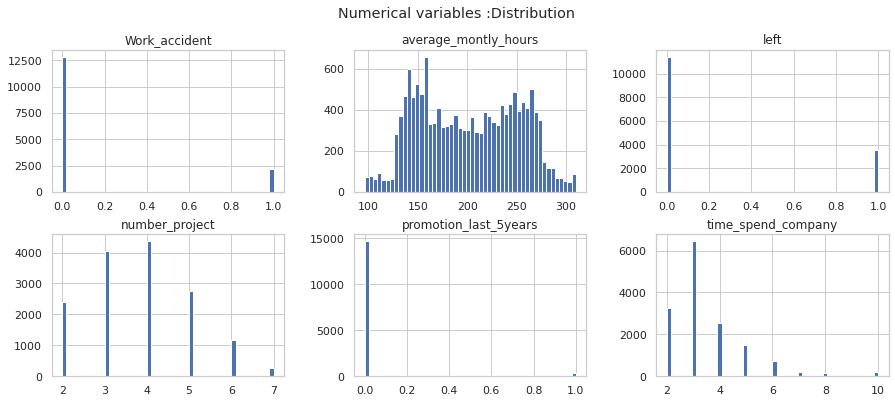

In [21]:
#exploring the distribution of the numerical variables
num =dataset_df_final.select_dtypes(include=[np.int64])
num.hist(bins=50,figsize=(15,6),layout=(2,3))
plt.suptitle("Numerical variables :Distribution")
plt.show()

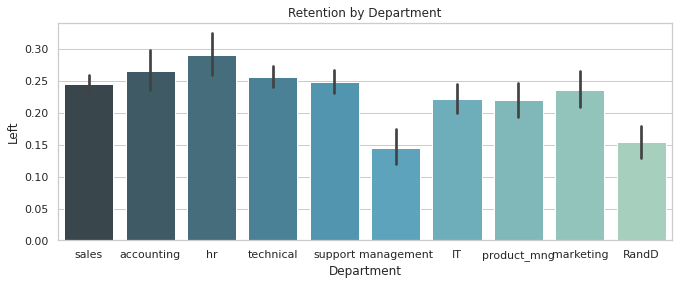

In [16]:
#retention vs department
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df_final["department"],y=dataset_df_final["left"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("Department")
plt.ylabel("Left")
plt.title("Retention by Department")
plt.show()

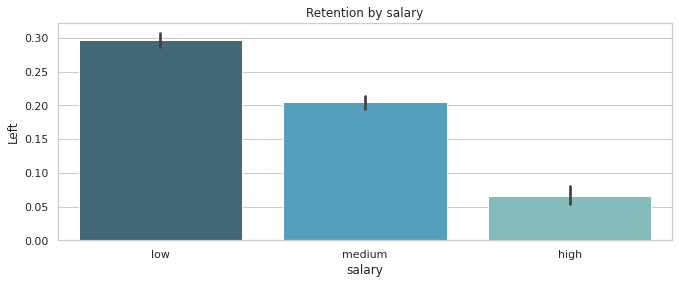

In [17]:
#retention vs salary
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df_final["salary"],y=dataset_df_final["left"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("salary")
plt.ylabel("Left")
plt.title("Retention by salary")
plt.show()

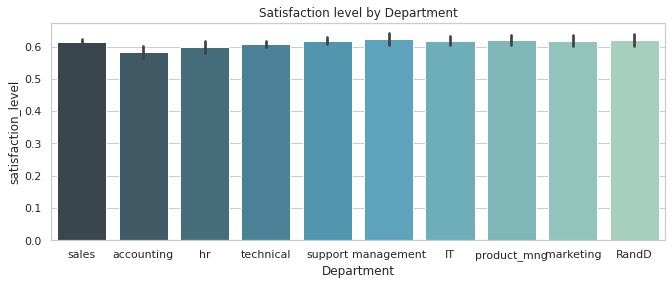

In [19]:
#satisfaction-level vs department
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df_final["department"],y=dataset_df_final["satisfaction_level"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("Department")
plt.ylabel("satisfaction_level")
plt.title("Satisfaction level by Department")
plt.show()

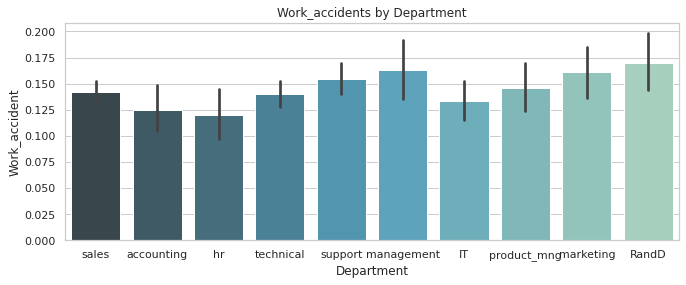

In [20]:
#work-accidents vs department
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df_final["department"],y=dataset_df_final["Work_accident"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("Department")
plt.ylabel("Work_accident")
plt.title("Work_accidents by Department")
plt.show()

**Displaying the Correlation Matrix**

The correlation matrix basically shows the correlation betwen the variables.Each cell shows the correlation between two variables.


No handles with labels found to put in legend.


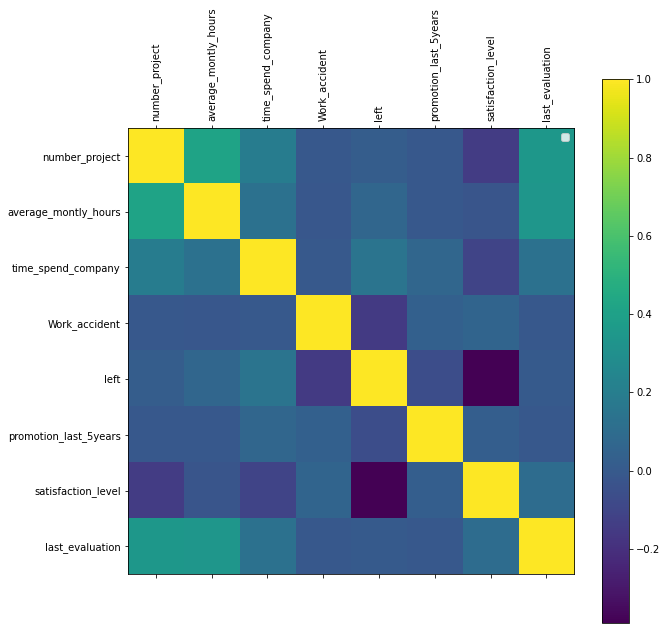

In [ ]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(dataset_df_final)


**Data Preparation**

Here,we prepare the dataset for the machine learning model.Firstly,it is important to note that  many machine learning algorithms cannot work with categorical data directly.Categorical data(as seen in column -departments and salary) must be converted to numbers.One hot encoding is a representation of categorical variables as binary vectors.

In [ ]:
#perform One-Hot-Encoding on Categorical Data
categorial = ['department','salary']
dataset_df_final= pd.get_dummies(dataset_df_final, columns=categorial, drop_first=True)
dataset_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


Identify target and feature variables

In [ ]:
#identify the feature and target values
target_value=dataset_df_final['left']
feature_value=dataset_df_final.drop(['left'],axis=1)

Check whether dataset is balanced or unbalanced

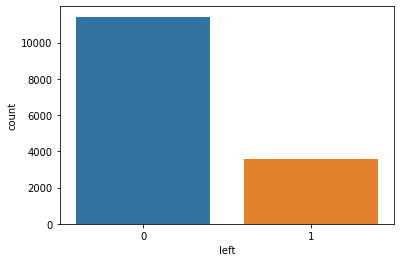

In [ ]:
dataset_df_final['left'].value_counts()
sns.countplot(x ='left',data=dataset_df_final)


It is clear that the dataset is unbalanced i.e there is a disproportionate ratio of the observation in each class and this could lead to overfitting.

This informs our choice of algorithm and evaluation metric.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature_value,target_value,test_size =0.30)

#split the dataset into train and test data 
#x_train represents the feature value of training data
#x_test represents the feature value of test data
#y_train represents the target value of training data
#y_test represents the feature value of test data

Since the range of values of the raw data vary widely ,the objective function in some classifiers will not work properly without normalization.Here,we employ Standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler
#feature scaling_standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


**DEVELOP  A BASELINE MODEL**

**We start by looking at Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score

model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)

predictions = model.predict(x_test)

print("f1-score {0:.2f}%".format(100*f1_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

f1-score 43.56%
[[3218  245]
 [ 680  357]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3463
           1       0.59      0.34      0.44      1037

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.65      4500
weighted avg       0.77      0.79      0.77      4500



Let us try Random Forest Algorithm(a more advanced algorithm)

**Let us try Random Forest Algorithm(a more advanced algorithm)**





In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,make_scorer,f1_score
from sklearn.model_selection import GridSearchCV

#building an Random Forest pipeline
pipe = Pipeline([('clf', RandomForestClassifier())])
#RF hyperparameters declaration
search_space = [
  {
    'clf__n_estimators': [50,100,150],
    'clf__max_depth': [5,15,20],
    'clf__min_samples_split': [1,3,5],
    'clf__min_samples_leaf': [1,3,5],
    'clf__max_features':[0.7,"auto"]
  }
]
# Define K-fold cross validation,Where k=10
kfold = KFold(n_splits=10, random_state=42)
# Precision as score
scoring = { 'F1Score':make_scorer(f1_score)}
# Define grid search to find the best model setting
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='F1Score',
  verbose=1,
  n_jobs=-1
)
model = grid.fit(x_train, y_train)

predictions = model.predict(x_test)

print("f1-score {0:.2f}%".format(100*f1_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 13.6min finished


f1-score 97.06%
[[3451   12]
 [  48  989]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3463
           1       0.99      0.95      0.97      1037

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

